In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the input data
train_data = pd.read_csv('/content/drive/MyDrive/Python Course/Hackathons/Train_dataset_(2).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Python Course/Hackathons/Test_dataset_(2).csv')

In [4]:
test_data = test_data.rename(columns={"Endoresed By":"Endorsed By"})

In [5]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [6]:
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000.0,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000.0,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000.0,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000.0,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000.0,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [7]:
df.tail()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
3988,20496,NaN,"indian,irish",Noida,Near Party Hub,08/09/09,72.00,Not Specific,72.00,1,...,9.0,5.0,NaN,NaN,NaN,7.0,8,5,2,7
3989,20497,NaN,"tibetan,greek",Bangalore,Near Party Hub,20/06/07,78.28,Not Specific,53.55,1,...,8.0,3.0,NaN,NaN,NaN,9.0,8,8,4,8
3990,20498,NaN,"indian,irish",Bangalore,Near Party Hub,19/06/10,72.60,Tier A Celebrity,71.40,0,...,9.0,5.0,NaN,4.0,NaN,1.0,6,5,7,2
3991,20499,NaN,"tibetan,greek",Chennai,Near Party Hub,23/08/12,93.40,Not Specific,95.90,1,...,9.0,6.0,6.0,NaN,NaN,7.0,7,2,3,5
3992,20500,NaN,"tibetan,greek",Bhopal,Near Party Hub,10/03/10,65.50,Not Specific,68.20,1,...,9.0,5.0,NaN,NaN,NaN,7.0,6,6,7,7




*   The dataset contains both numerical and categorical columns as well as some missing values



In [8]:
train_data.shape

(3493, 34)

In [9]:
test_data.shape

(500, 33)

In [10]:
df.shape

(3993, 34)



*   The dataset contains 34 columns and 3993 rows



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Opening Day of Restaurant      3993 non-null   object 
 6   Facebook Popularity Quotient   3894 non-null   float64
 7   Endorsed By                    3993 non-null   object 
 8   Instagram Popularity Quotient  3937 non-null   float64
 9   Fire Audit                     3993 non-null   int64  
 10  Liquor License Obtained        3993 non-null   int64  
 11  Situated in a Multi Complex    3993 non-null   int64  
 12  Dedicated Parking              3993 non-null   i



*   The dataset contains 7 categorical and 27 numerical (10 float and 17 int) columns



In [12]:
df.duplicated().sum()

0



*   The dataset contains no duplicates



In [13]:
df.nunique()

Registration Number              3993
Annual Turnover                   173
Cuisine                            20
City                              334
Restaurant Location                 2
Opening Day of Restaurant        1870
Facebook Popularity Quotient      840
Endorsed By                         3
Instagram Popularity Quotient     795
Fire Audit                          2
Liquor License Obtained             2
Situated in a Multi Complex         2
Dedicated Parking                   2
Open Sitting Available              2
Resturant Tier                      2
Restaurant Type                     4
Restaurant Theme                   34
Restaurant Zomato Rating            6
Restaurant City Tier                2
Order Wait Time                    10
Staff Responsivness                 8
Value for Money                     7
Hygiene Rating                      9
Food Rating                         6
Overall Restaurant Rating           5
Live Music Rating                   8
Comedy Gigs 



*   'Registration Number' is the only column that contains distinct values; it will be dropped



In [14]:
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000.0,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000.0,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000.0,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000.0,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000.0,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Registration Number,3993.0,NaN,NaN,NaN,56550.844227,13768.143026,20001.0,60499.0,61497.0,62495.0,63493.0
Annual Turnover,3493.0,NaN,NaN,NaN,30725708.559977,21651246.901146,3500000.0,18000000.0,30000000.0,37000000.0,400000000.0
Cuisine,3993,20,"tibetan,greek",801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3993,334,Bangalore,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Restaurant Location,3993,2,Near Party Hub,3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opening Day of Restaurant,3993,1870,27/12/09,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Facebook Popularity Quotient,3894.0,NaN,NaN,NaN,77.887678,9.861789,43.0,71.66,79.0,85.6675,97.76
Endorsed By,3993,3,Not Specific,2260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instagram Popularity Quotient,3937.0,NaN,NaN,NaN,74.448954,10.990665,40.0,66.0,74.33,82.6,98.7
Fire Audit,3993.0,NaN,NaN,NaN,0.791886,0.40601,0.0,1.0,1.0,1.0,1.0


In [16]:
df["Opening Day of Restaurant"] = pd.to_datetime(df["Opening Day of Restaurant"])



*   "Opening Day of Restaurant" datatype changed to datetime



In [17]:
import datetime
from datetime import date

df["Age Offset 2010 Debut"] = ((df["Opening Day of Restaurant"].dt.date-date(2010, 1, 1)))/np.timedelta64(1, 'D')
df = df.drop('Opening Day of Restaurant', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Facebook Popularity Quotient   3894 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3937 non-null   float64
 8   Fire Audit                     3993 non-null   int64  
 9   Liquor License Obtained        3993 non-null   int64  
 10  Situated in a Multi Complex    3993 non-null   int64  
 11  Dedicated Parking              3993 non-null   int64  
 12  Open Sitting Available         3993 non-null   i



*   "Opening Day of Restaurant" replaced by "Age Offset 2010 Debut"



In [19]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Registration Number            3993 non-null   int64   
 1   Annual Turnover                3493 non-null   float64 
 2   Cuisine                        3993 non-null   category
 3   City                           3993 non-null   category
 4   Restaurant Location            3993 non-null   category
 5   Facebook Popularity Quotient   3894 non-null   float64 
 6   Endorsed By                    3993 non-null   category
 7   Instagram Popularity Quotient  3937 non-null   float64 
 8   Fire Audit                     3993 non-null   int64   
 9   Liquor License Obtained        3993 non-null   int64   
 10  Situated in a Multi Complex    3993 non-null   int64   
 11  Dedicated Parking              3993 non-null   int64   
 12  Open Sitting Available         399



*   object column datatypes changed to categorical



In [21]:
df.isnull().sum()

Registration Number                 0
Annual Turnover                   500
Cuisine                             0
City                                0
Restaurant Location                 0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         246
Live Music Rating                 867
Comedy Gigs Rating               2853
Value Deals 



*   10 columns contain missing values
*   For 3 of those columns, more than 30% (precisely more than 70%) of their respective values are missing; so these columns will simply be dropped



In [22]:
# defining columns where we need to drop because of too many missing values
cols_too_missing = ["Comedy Gigs Rating", "Value Deals Rating", "Live Sports Rating"]

In [23]:
df = df.drop(cols_too_missing, axis=1)

In [24]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        246
Live Music Rating                867
Ambience                          25
Lively                             0
S

<ipython-input-25-f32db7e60b79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


<Axes: >

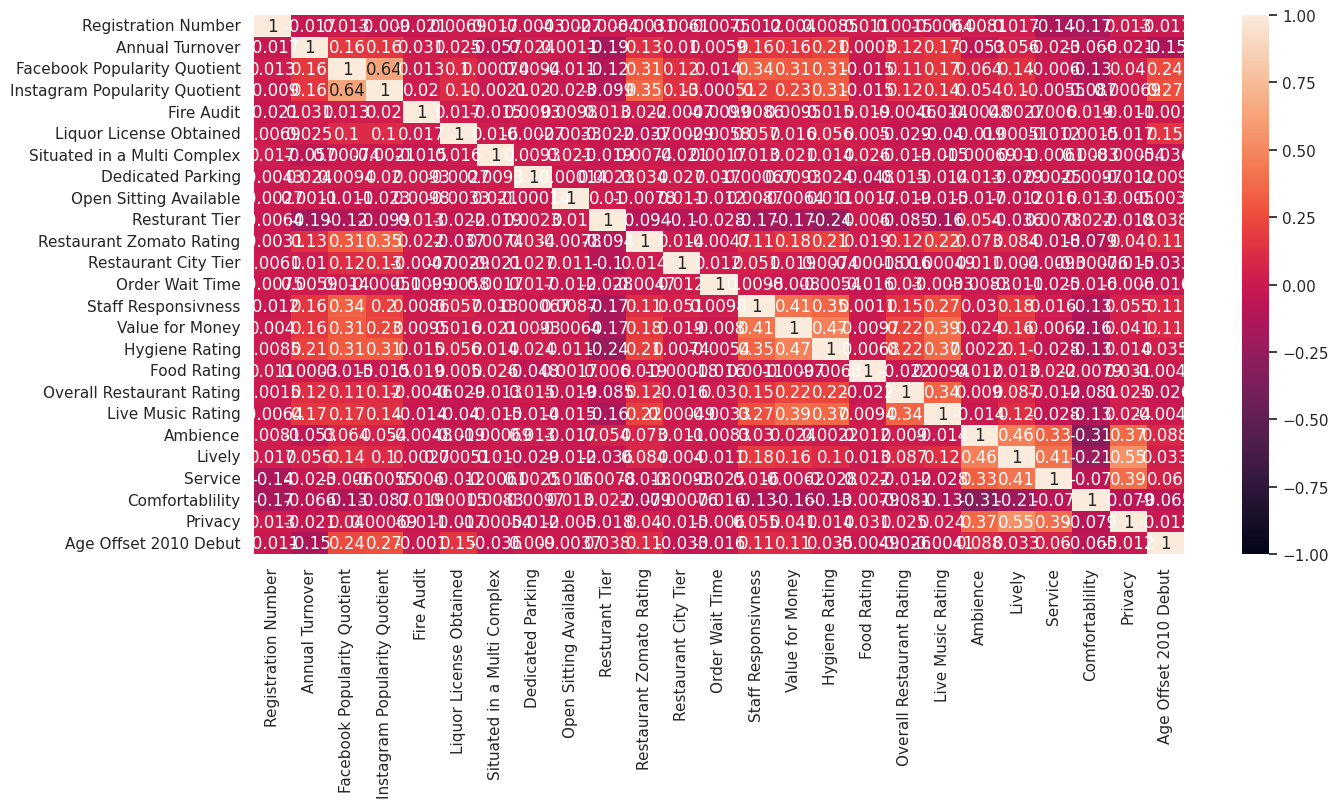

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)



*   The only significant correlation is between "Facebook Popularity Quotient" and "Instagram Popularity Quotient"

In [26]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [27]:
cols_hist_box = ['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Age Offset 2010 Debut']

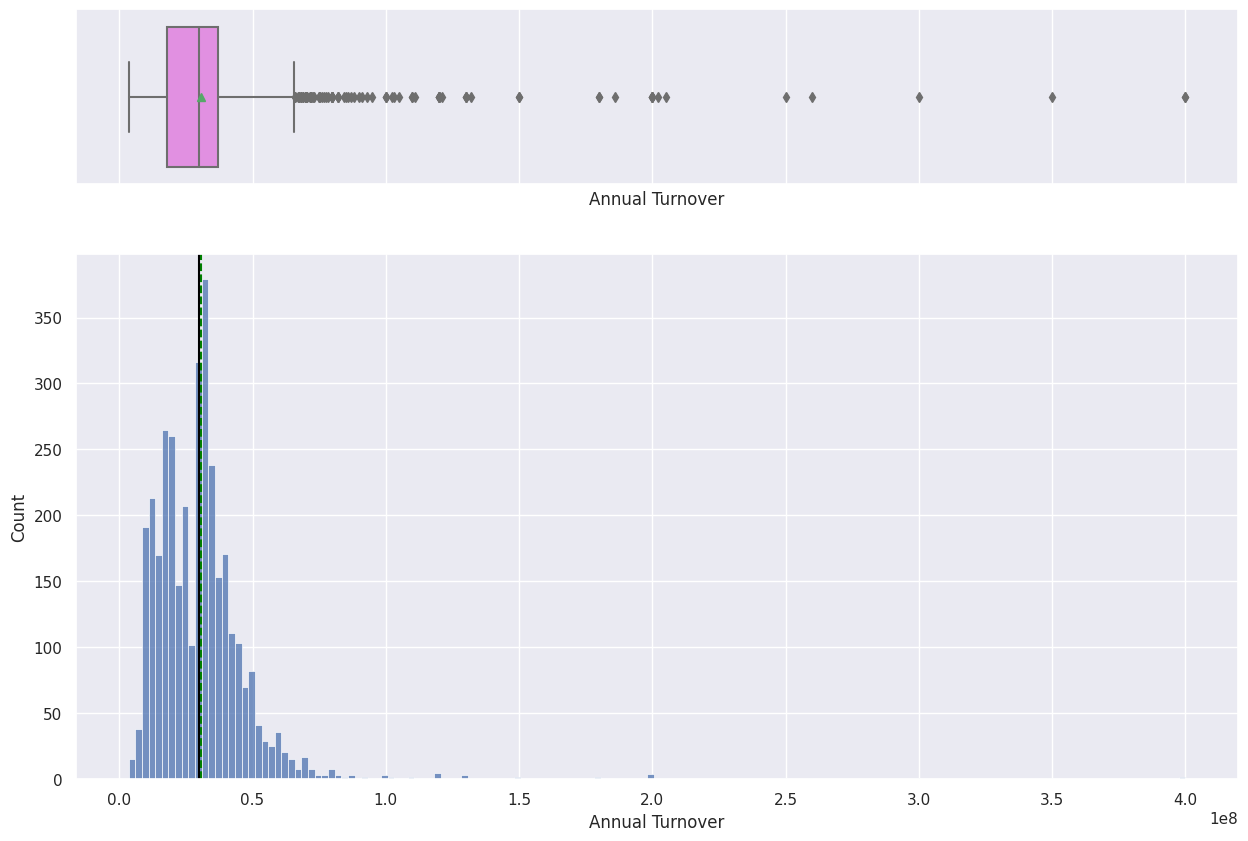

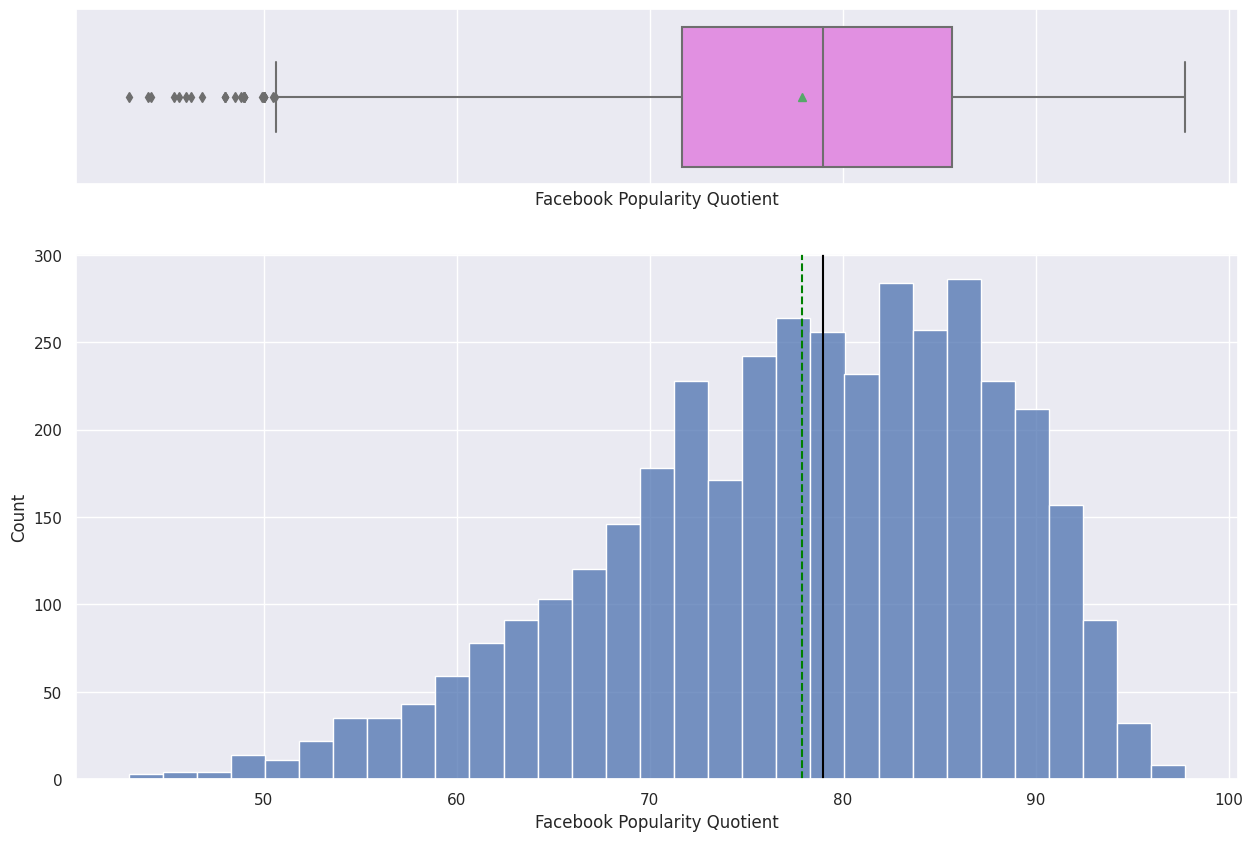

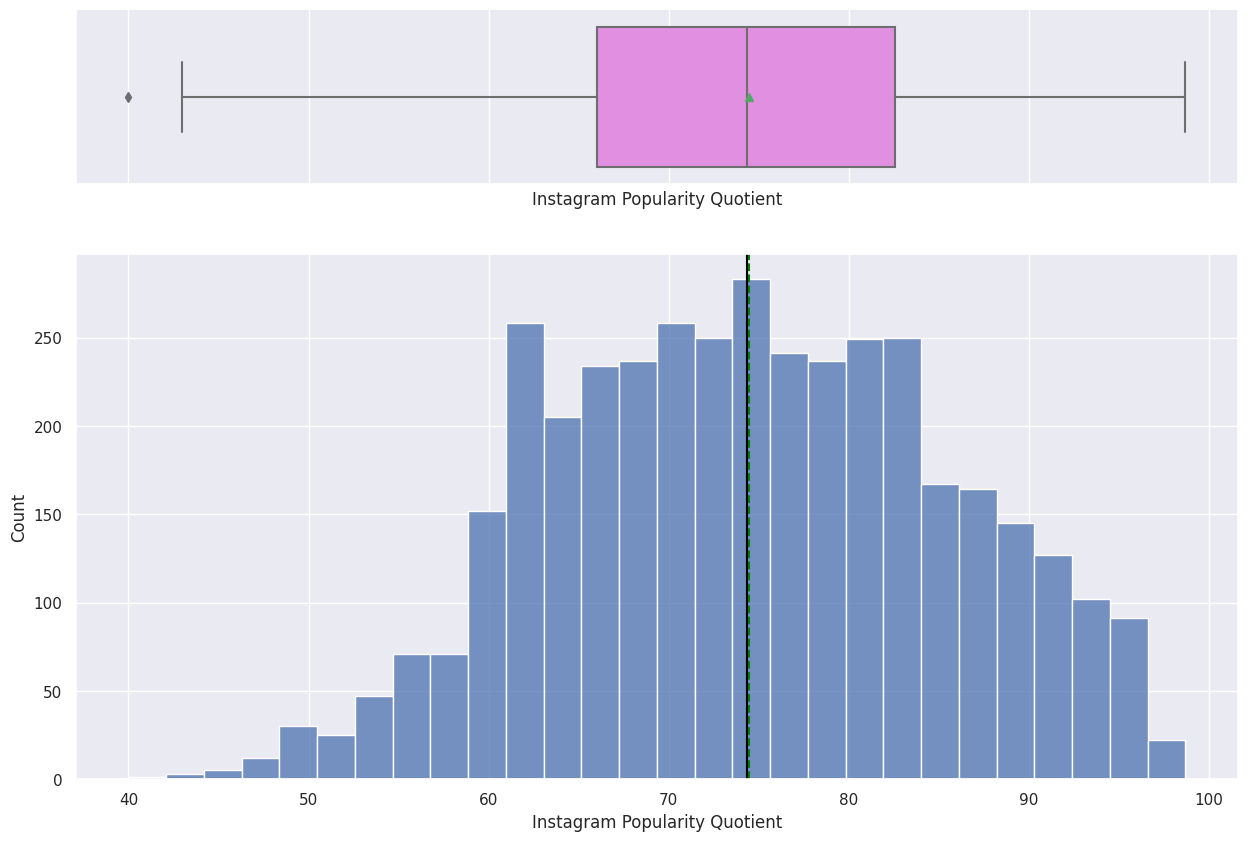

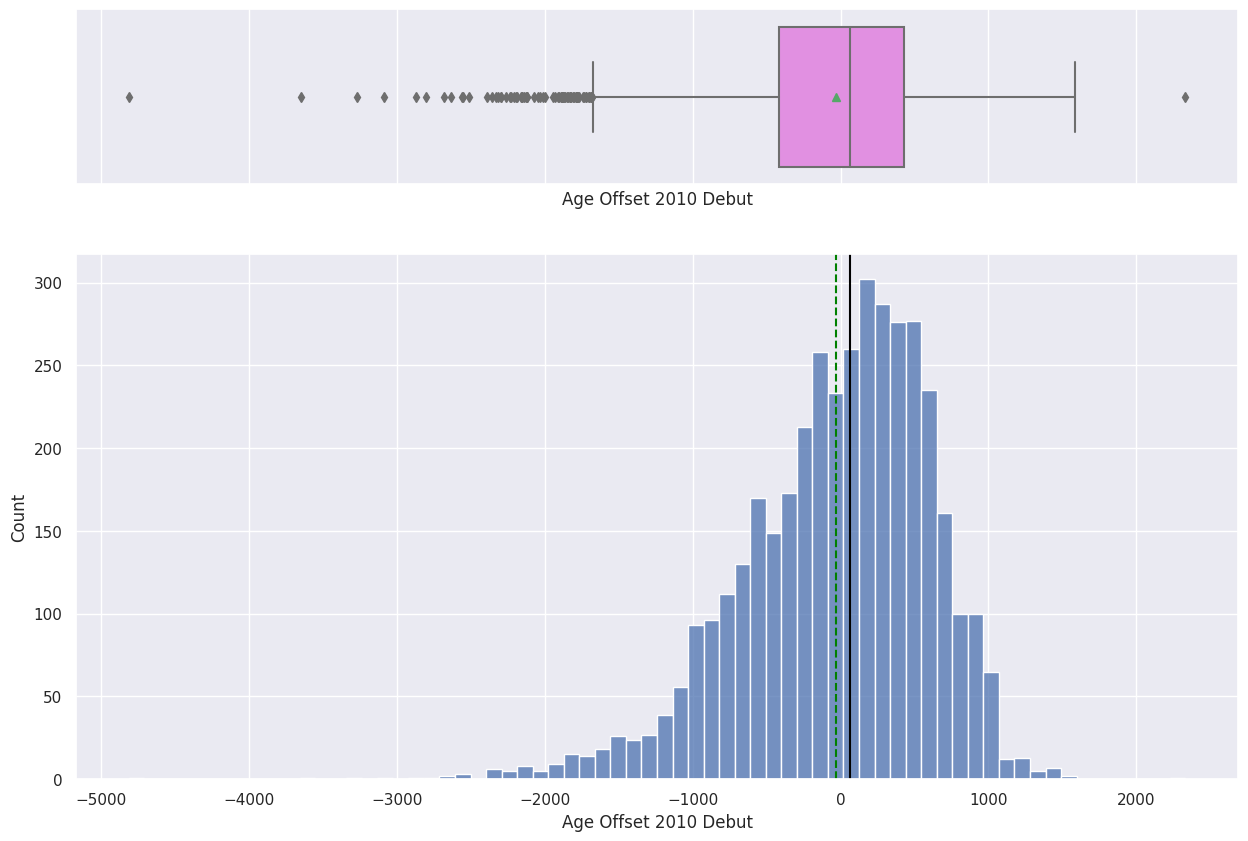

In [28]:
for column in cols_hist_box:
    histogram_boxplot(df, column)



*   The Annual Turnover is right-skewed with several upper outliers; the average and median are approximately 30 M Euros
*   Facebook Popularity Quotient is left-skewed with several lower outliers; the average and median are respectively approximately 78% and 79%
*   Instagram Popularity Quotient is also left-skewed but has much less fewer outliers than Facebook Popularity Quotient; the average and median are approximately 74%
*   Age Offset 2010 Debut is left-skewed with several more lower outliers than upper outliers; the average and median are respectively slightly lower and higher than 0








In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
cols_bar = ['Cuisine', 'City', 'Restaurant Location', 'Endorsed By', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy']

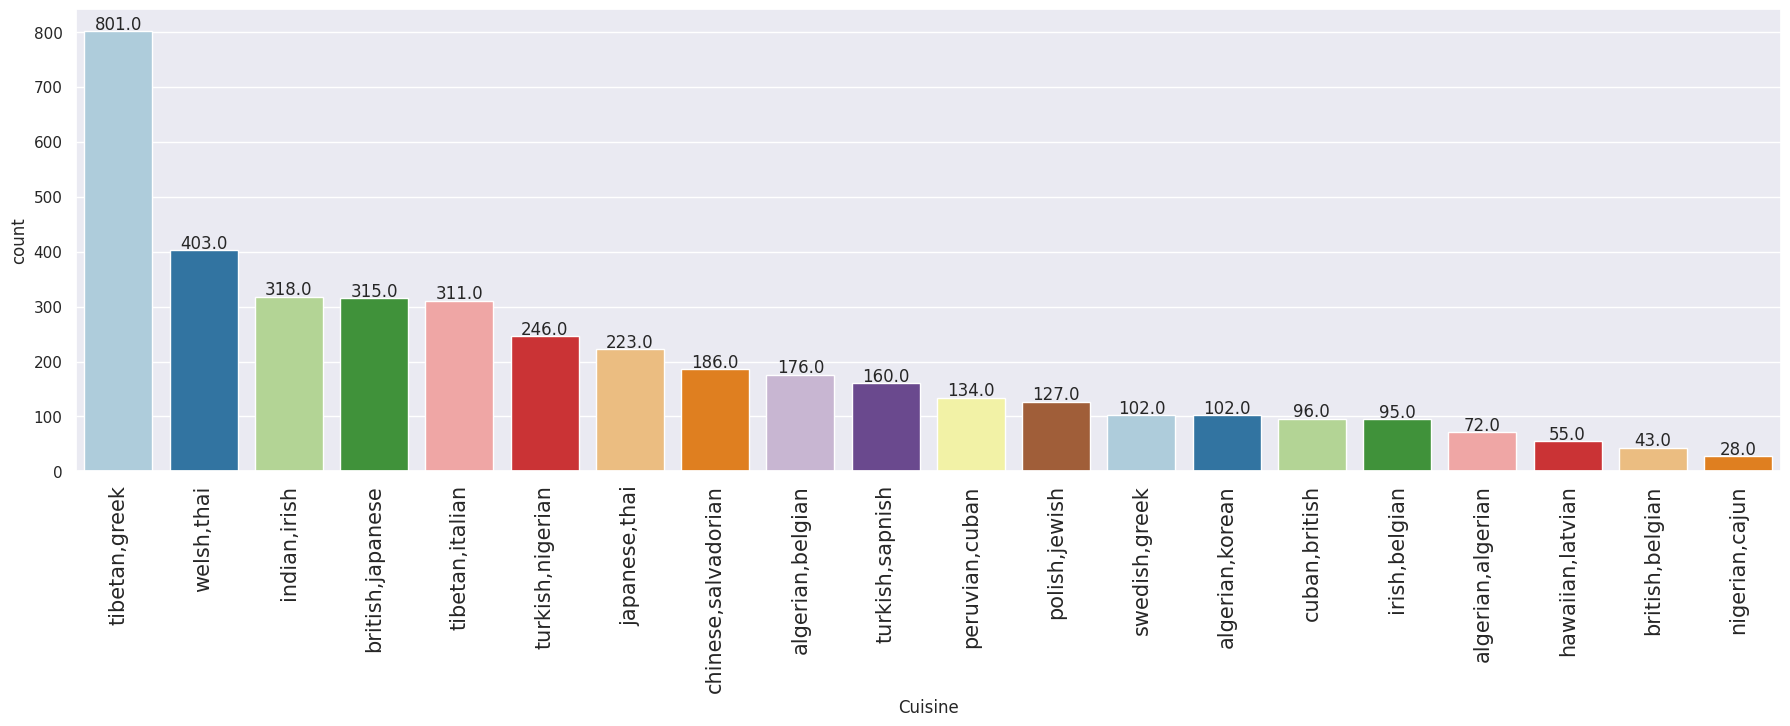

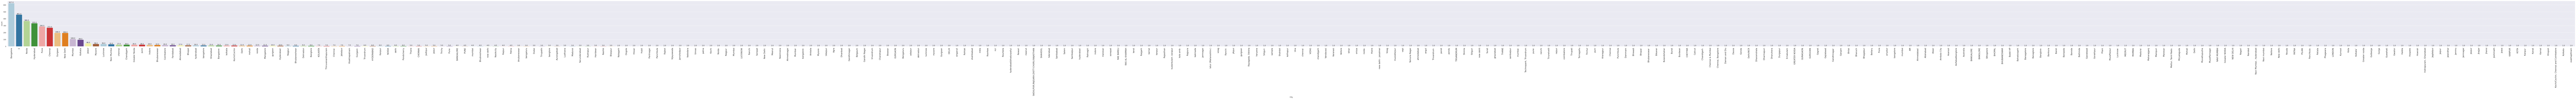

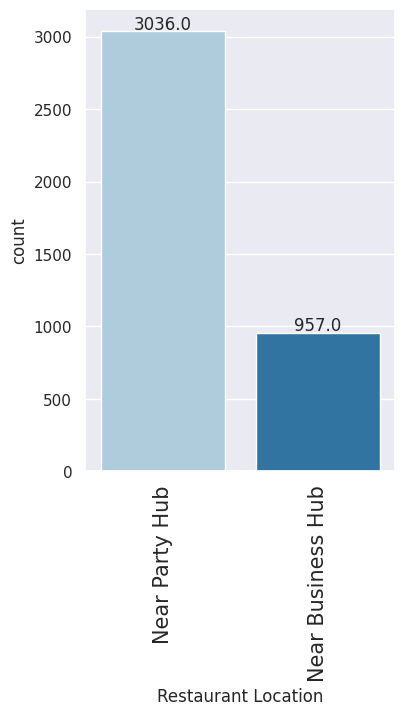

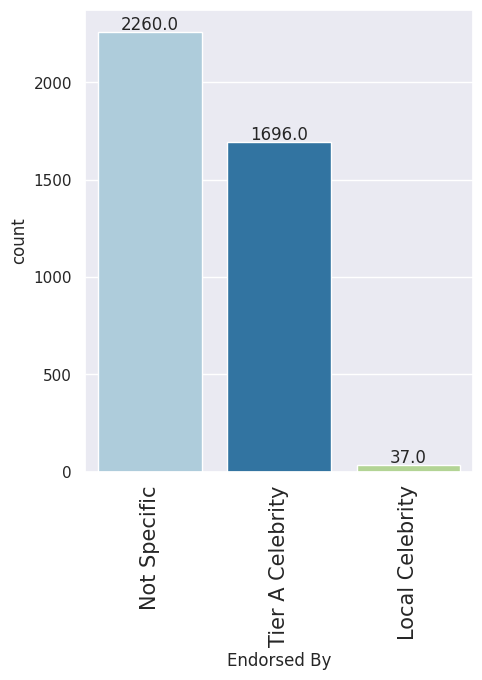

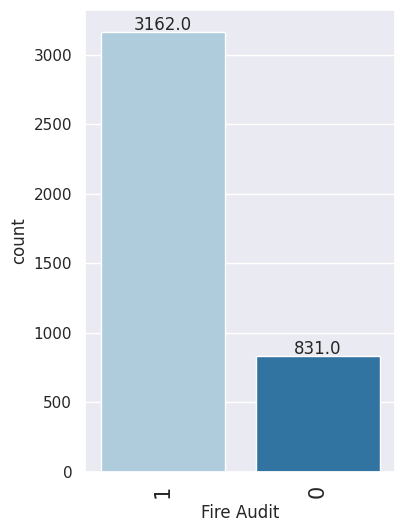

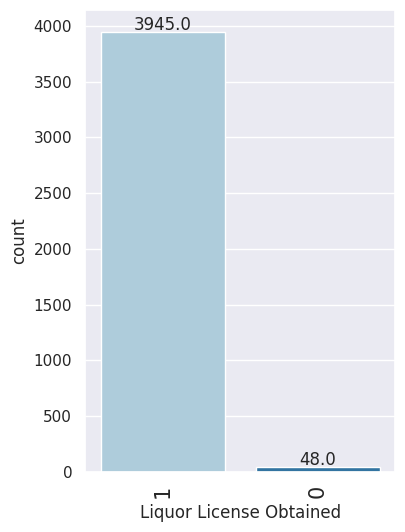

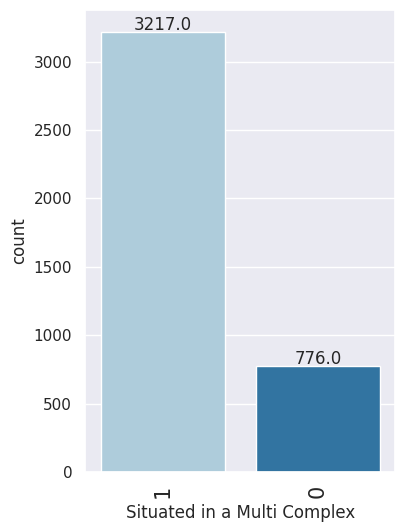

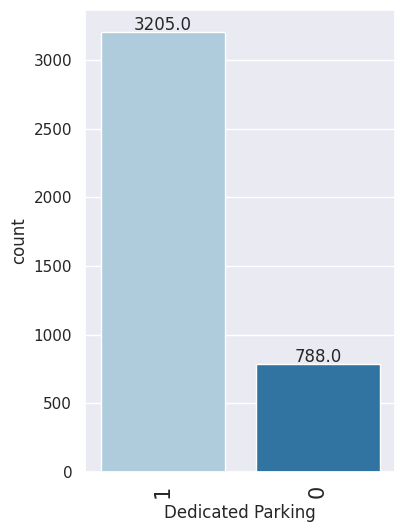

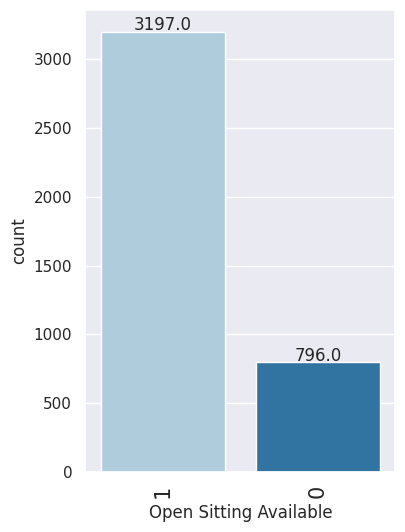

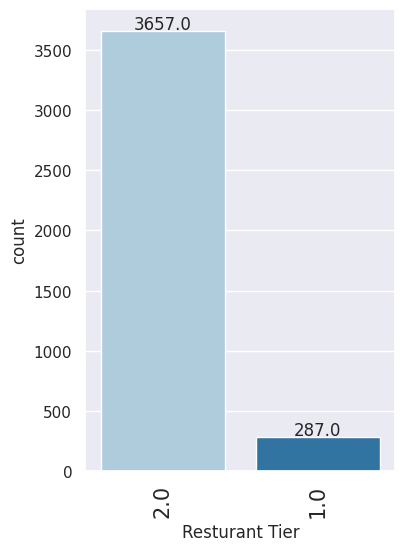

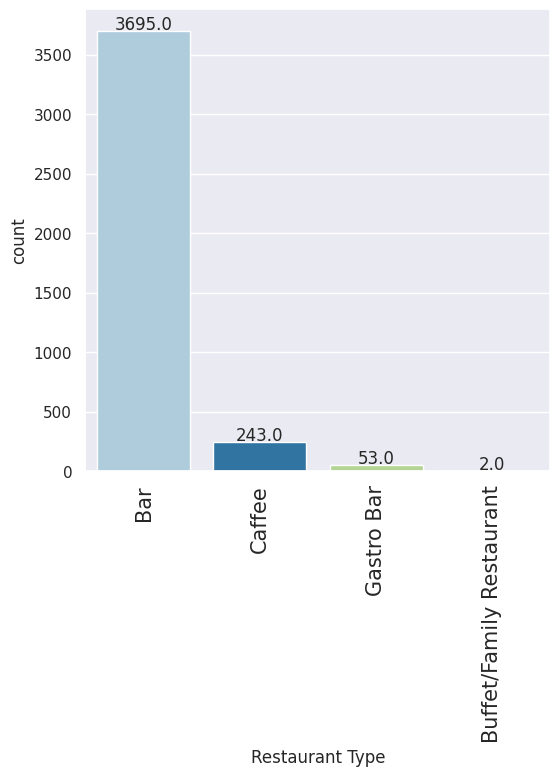

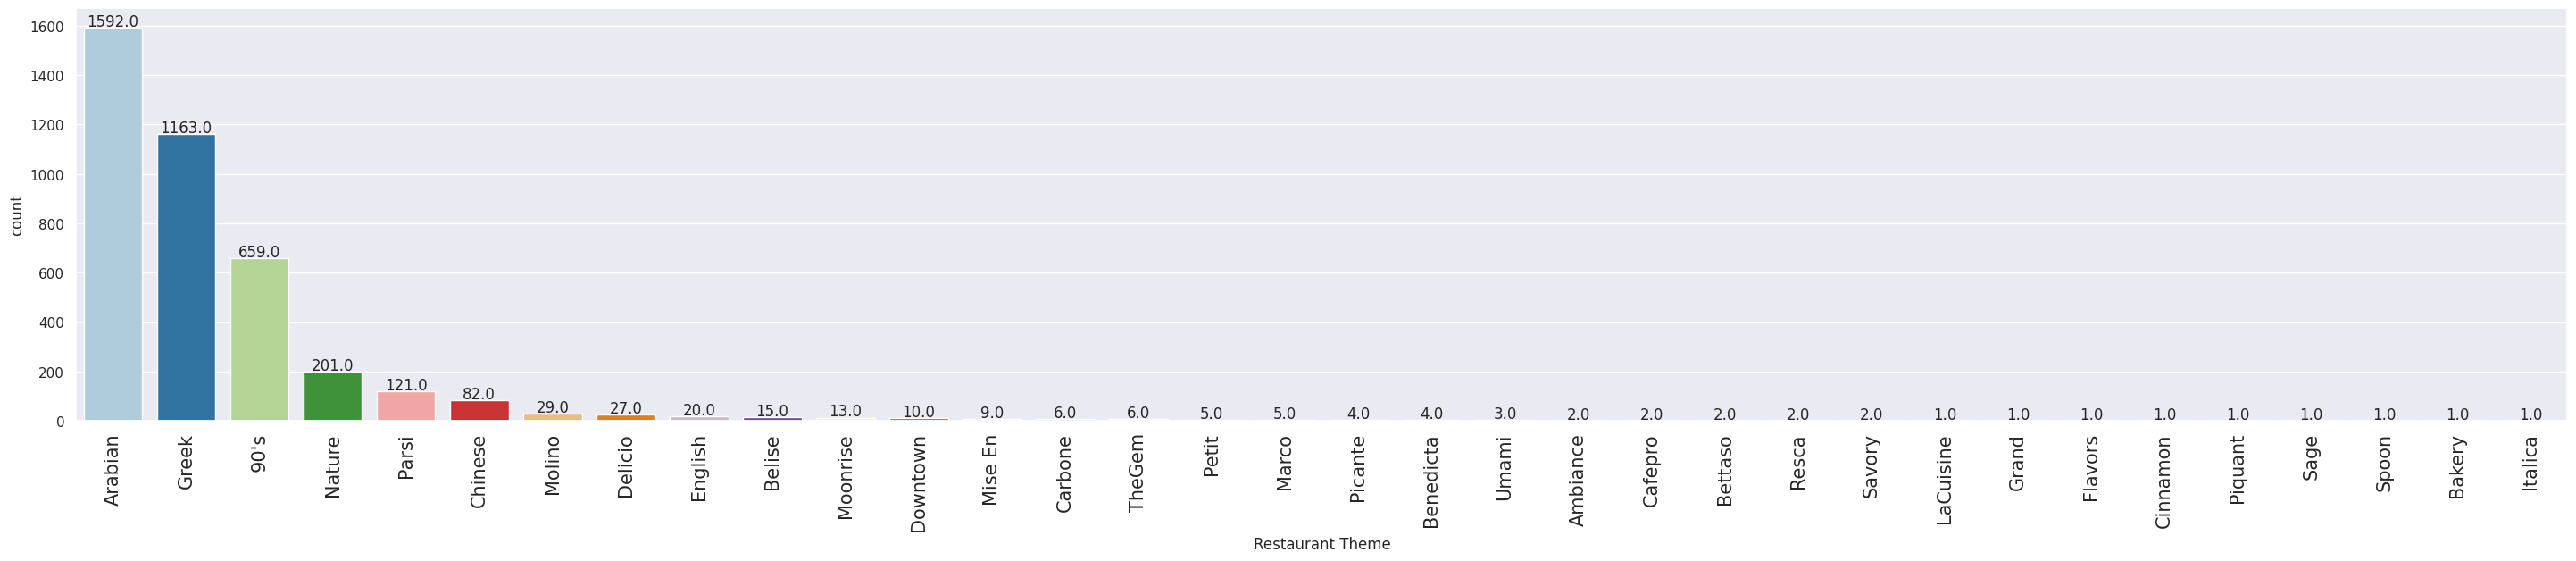

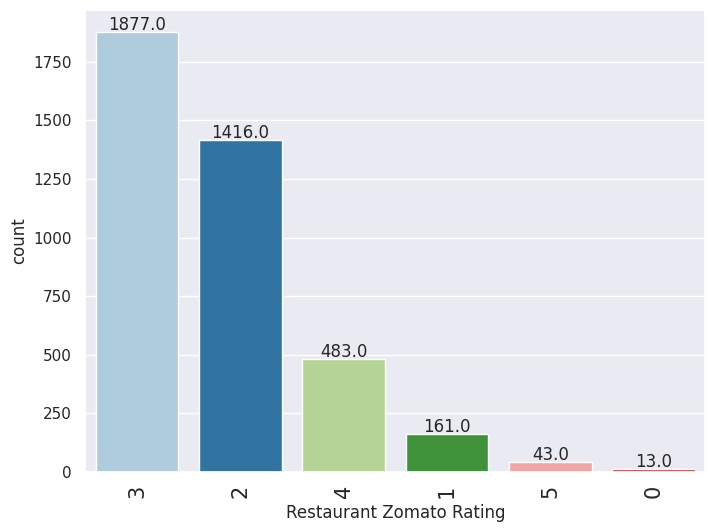

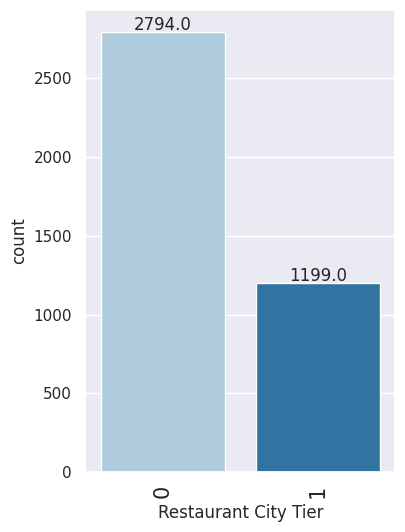

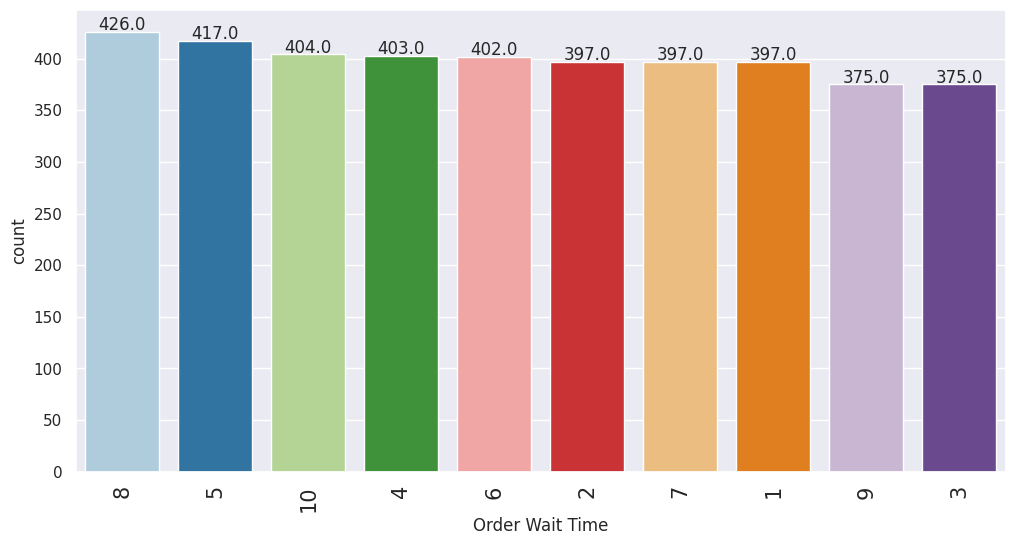

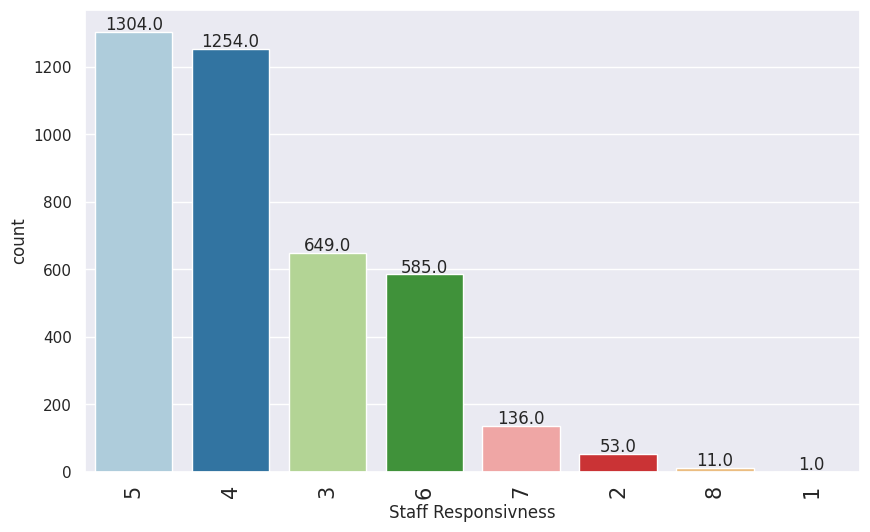

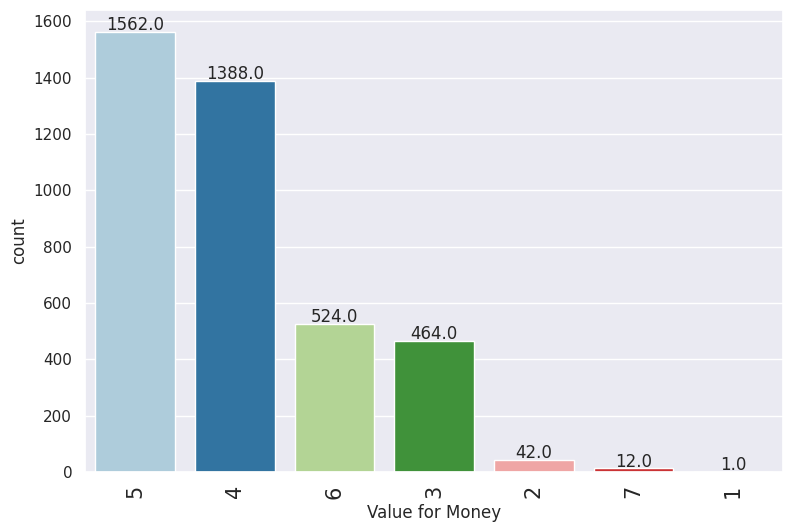

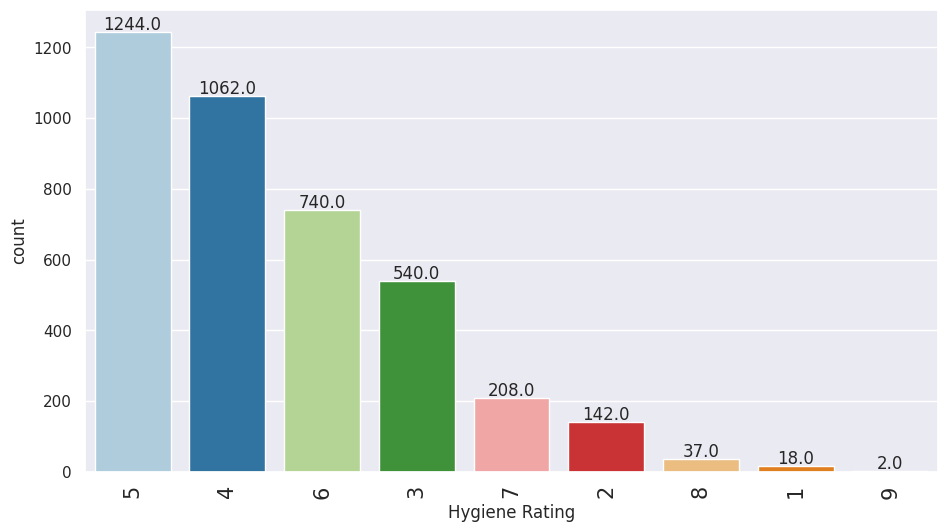

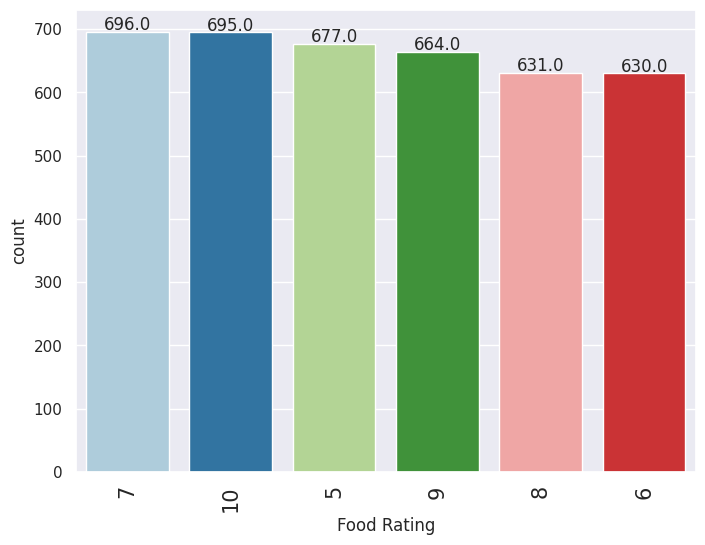

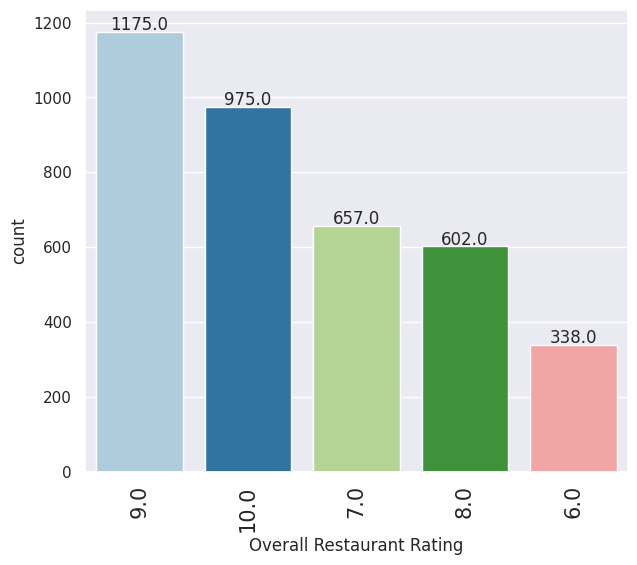

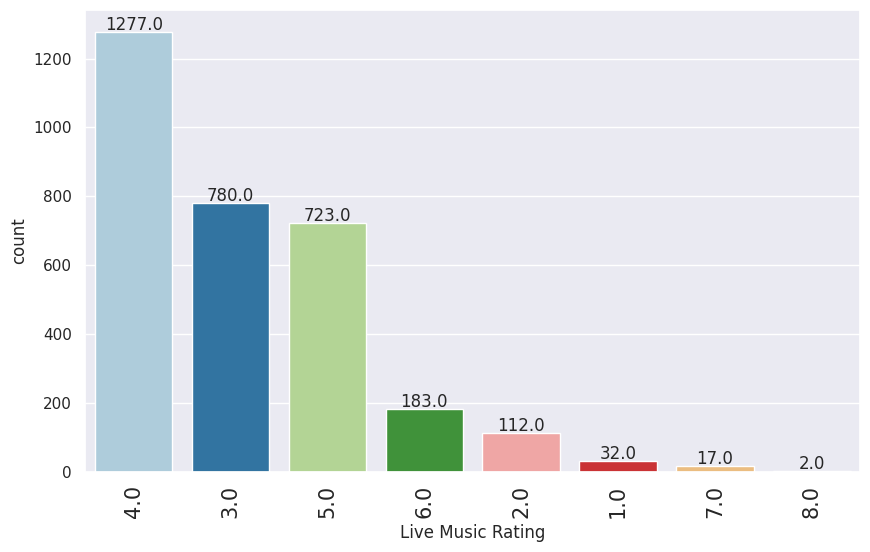

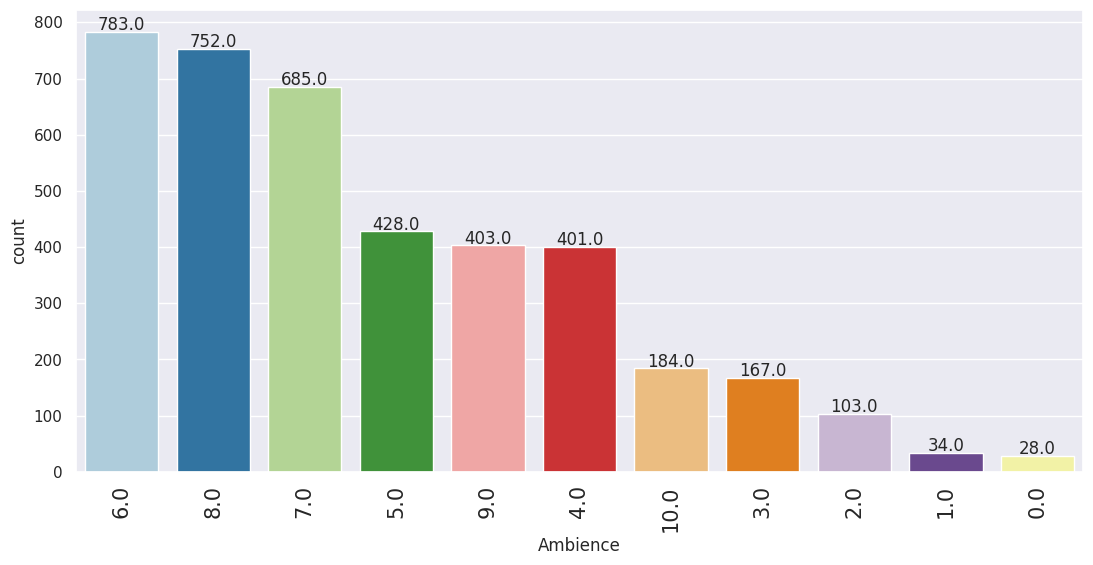

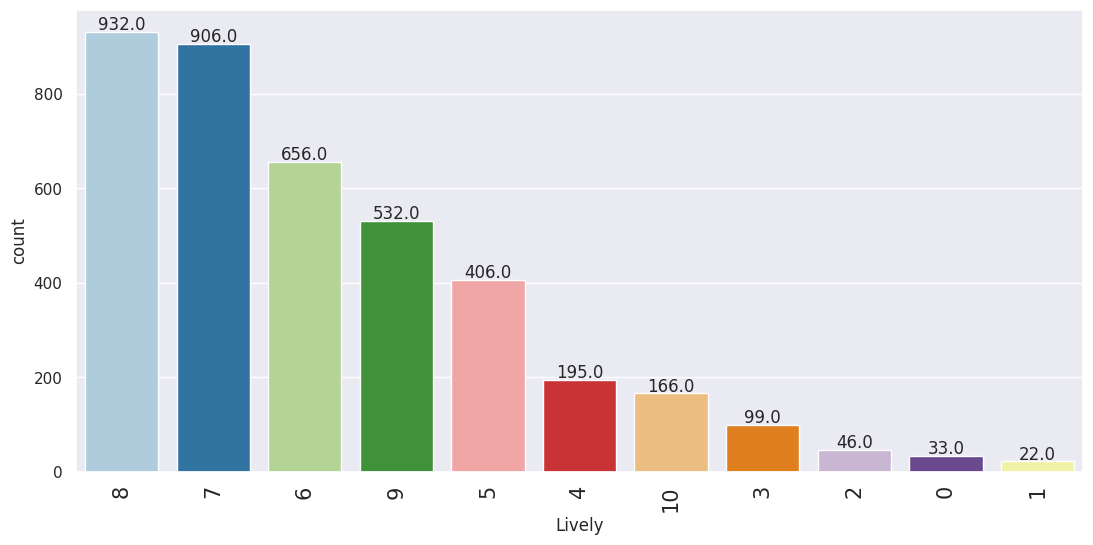

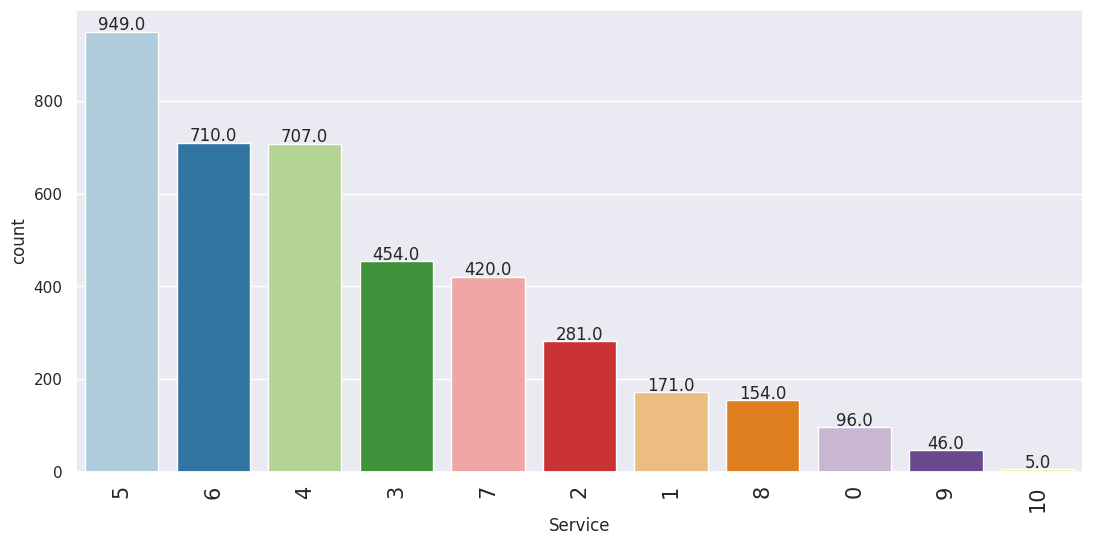

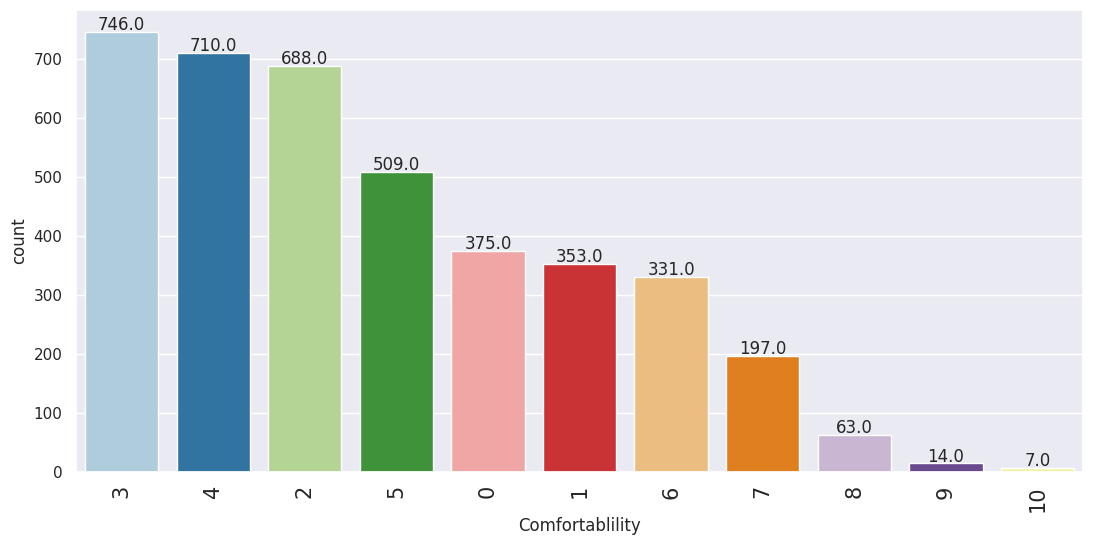

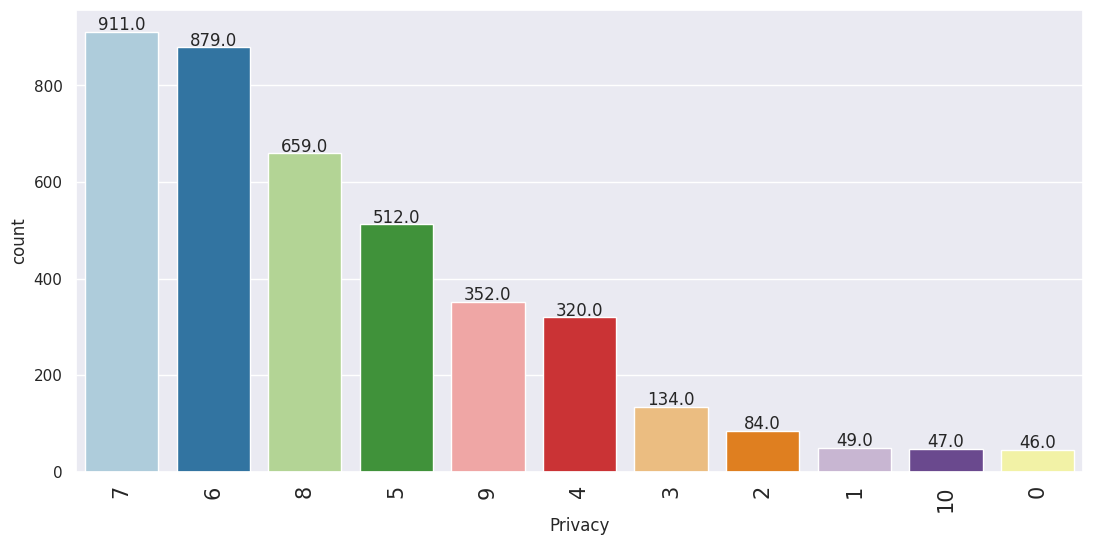

In [33]:
for column in cols_bar:
    labeled_barplot(df, column)

*   Tibetan,greek and nigerian,cajun are respectively the most and least popular cuisine (20% and 0.7% respectively)
*   There are too many cities to analyze in a single barplot; we will display the cities having the most and least number of restaurants
*   76% of the restaurants are situated near party hubs while the others are close to business hubs
*   57% of the restaurants have received no specific endorsements; 42% received endorsements from Tier A Celebrities; and the remaining 1% from Local Celebrities
*   79% of the restaurants contain fire safety
*   99% of the restaurants have obtained a liquor license
*   81% are situated in a multi complex
*   80% have dedicated parking space
*   80% have open sitting
*   92% are Tier 2 restaurants; the rest are Tier 1
*   The most and least popular restaurant types are respectively Bars (93%) and Buffet/Family Restaurants (0.05%)
*   The most and least popular restaurant themes are respectively Arabian (40%) and Italica (0.03%)
*   The most and least popular ratings are respectively 3 (47%) and 0 (0.3%)
*   70% of the restaurants belong to Restaurant City Tier 0; the rest belong to Restaurant City Tier 1
*   The most and least frequent Order Wait Times are respectively 8 (11%) and 9 and 3 (9% each)
*   The most and least frequent Staff Responsiveness ratings are respectively 5 (33%) and 1 (0.03%)
*   The most and least frequent Value for Money ratings are respectively 5 (39%) and 1 (0.03%)
*   The most and least frequent Hygiene Ratings are respectively 5 (31%) and 9 (0.05%)
*   The most and least frequent Food Ratings are respectively 7 (17.4%) and 6 (16%)
*   The most and least frequent Overall Restaurant Ratings are respectively 9 (29.4%) and 6 (8.5%)
*   The most and least frequent Live Music Restaurant Ratings are respectively 4 (32%) and 8 (0.05%)
*   The most and least frequent Ambience ratings are respectively 6 (19.6%) and 0 (0.7%)
*   The most and least frequent Lively ratings are respectively 8 (23.3%) and 1 (0.6%)
*   The most and least frequent Service ratings are respectively 5 (24%) and 10 (0.1%)
*   The most and least frequent Comfortability ratings are respectively 3 (19%) and 10 (0.2%)
*   The most and least frequent Privacy ratings are respectively 7 (23%) and 0 (1.2%)



























In [34]:
print("Top cities:")
df['City'].value_counts().head().sort_values(ascending=False)

Top cities:


Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Name: City, dtype: int64

In [35]:
print("Least cities:")
df['City'].value_counts().tail().sort_values(ascending=False)

Least cities:


Karnal                                  1
Khopoli                                 1
Kochi/Cochin, Chennai and Coimbatore    1
Kolkata                                 1
vsakhapttnam                            1
Name: City, dtype: int64



*   The city containing the greatest number of restaurants is Bangalore (16%); every other city has at least one restaurant and several cities have, each, one restaurant
*   Among the top cities having the several restaurants, one has a strange name, "-1"; we will verify how many cities have numerical values as names



In [36]:
pd.to_numeric(df['City'], errors='coerce').dropna().unique()

array([-1.])



*   Only one city has a numerical value as name, we will replace the name with the null value



In [37]:
df['City'] = df['City'].replace('-1', None)

In [38]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                             461
Restaurant Location                0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        246
Live Music Rating                867
Ambience                          25
Lively                             0
S



*   We now have 8 columns with missing values
*   In order not signficantly transform the data, we will replace the null values in the 'City' column with the value 'unknown'



In [39]:
df['City'] = df['City'].cat.add_categories('unknown')
df['City'].fillna('unknown', inplace=True)

In [40]:
df.isnull().sum()

Registration Number                0
Annual Turnover                  500
Cuisine                            0
City                               0
Restaurant Location                0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                    49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        246
Live Music Rating                867
Ambience                          25
Lively                             0
S



*   The missing values in the 'City' column have been effectively replaced



In [41]:
cols_still_missing = ["Annual Turnover", "Facebook Popularity Quotient", "Instagram Popularity Quotient", "Resturant Tier", "Overall Restaurant Rating", "Live Music Rating", "Ambience"]

for col in cols_still_missing:
    median_df = df.groupby(['Cuisine', 'Privacy'])[col].median().reset_index()
    print (median_df)

               Cuisine  Privacy  Annual Turnover
0    algerian,algerian        0              NaN
1    algerian,algerian        1       19500000.0
2    algerian,algerian        2       32000000.0
3    algerian,algerian        3       31250000.0
4    algerian,algerian        4       18000000.0
..                 ...      ...              ...
215         welsh,thai        6       25000000.0
216         welsh,thai        7       24000000.0
217         welsh,thai        8       20000000.0
218         welsh,thai        9       21250000.0
219         welsh,thai       10       22750000.0

[220 rows x 3 columns]
               Cuisine  Privacy  Facebook Popularity Quotient
0    algerian,algerian        0                           NaN
1    algerian,algerian        1                        69.000
2    algerian,algerian        2                        75.400
3    algerian,algerian        3                        77.965
4    algerian,algerian        4                           NaN
..              



*   Grouping the data by 'Cuising' and 'Privacy', both attributes being quite spread out as shown in the barplots, and computing the median values for the columns containing missing values, we realize that we still have some null values. We will go ahead and impute the median values to reduce the amount of missing values



In [42]:
df[cols_still_missing] = df[cols_still_missing].fillna(value = df.groupby(['Cuisine', 'Privacy'])[cols_still_missing].transform('median'))

In [43]:
df.isnull().sum()

Registration Number              0
Annual Turnover                  5
Cuisine                          0
City                             0
Restaurant Location              0
Facebook Popularity Quotient     1
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        2
Live Music Rating                9
Ambience                         0
Lively                           0
Service                          0
Comfortablility     



*   We see that the number of columns having missing values and the number of missing values per column have significantly reduced. We will go ahead and impute the remaining missing values, grouping by 'Cuisine'



In [44]:
cols_still_missing1 = ["Annual Turnover", "Facebook Popularity Quotient", "Overall Restaurant Rating", "Live Music Rating"]
df[cols_still_missing1] = df[cols_still_missing1].fillna(value = df.groupby(['Cuisine'])[cols_still_missing1].transform('median'))

In [45]:
df.isnull().sum()

Registration Number              0
Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility     



*   All the missing values have now been taken care of



In [46]:
# Declare predictor and target variables
X = df.drop(columns=['Annual Turnover'])
y = df[df['Registration Number'].isin(train_data['Registration Number'])]["Annual Turnover"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# let's add the intercept to data
X = sm.add_constant(X)

X_test = X[X['Registration Number'].isin(test_data['Registration Number'])]
X_test = X_test.drop(columns=['Registration Number'])

X = X[X['Registration Number'].isin(train_data['Registration Number'])]
X = X.drop(columns=['Registration Number'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
print("Shape of train predictor variable =", X_train.shape)
print("Shape of validation predictor variable =", X_val.shape)
print("Shape of train target variable =", y_train.shape)
print("Shape of validation target variable =", y_val.shape)

Shape of train predictor variable = (2445, 415)
Shape of validation predictor variable = (1048, 415)
Shape of train target variable = (2445,)
Shape of validation target variable = (1048,)


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Define the models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

results = {}  # Dictionary to store the model results

# Train and evaluate each model
for model_name, model in models.items():

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Evaluate on training data
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

    # Evaluate on validation data
    y_val_pred = model.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

    # Store the results
    results[model_name] = {'r2_train': r2_train, 'rmse_train': rmse_train,
                           'r2_val': r2_val, 'rmse_val': rmse_val}

# Find the best model based on the lowest RMSE on the validation data
best_model = min(results, key=lambda x: results[x]['rmse_val'])

# Use the best model to make predictions on the test data
y_test_pred = models[best_model].predict(X_test)

# Create a DataFrame for the predicted values and IDs
predictions = pd.DataFrame({'Registration Number': test_data['Registration Number'], 'Annual Turnover': y_test_pred})

# Save predictions to CSV file
predictions[['Registration Number', 'Annual Turnover']].to_csv('/content/drive/MyDrive/Python Course/Hackathons/Restaurant Turnover Prediction_Ariel Sama.csv', index=False)

# Print the results for each model
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"R-squared (Train): {result['r2_train']:.4f}")
    print(f"RMSE (Train): {result['rmse_train']:.4f}")
    print(f"R-squared (Validation): {result['r2_val']:.4f}")
    print(f"RMSE (Validation): {result['rmse_val']:.4f}")
    print()

print(f"The best model based on the lowest RMSE on the validation data is: {best_model}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+17, tolerance: 9.250e+13
  model = cd_fast.enet_coordinate_descent(


Ridge:
R-squared (Train): 0.2754
RMSE (Train): 16556945.7895
R-squared (Validation): 0.1101
RMSE (Validation): 24544608.4687

Lasso:
R-squared (Train): 0.2941
RMSE (Train): 16341955.1427
R-squared (Validation): 0.0903
RMSE (Validation): 24816235.5967

Decision Tree:
R-squared (Train): 1.0000
RMSE (Train): 0.0000
R-squared (Validation): -0.4830
RMSE (Validation): 31685801.0859

Random Forest:
R-squared (Train): 0.8609
RMSE (Train): 7254942.2122
R-squared (Validation): 0.0403
RMSE (Validation): 25489155.1259

SVR:
R-squared (Train): -0.0001
RMSE (Train): 19451787.8065
R-squared (Validation): -0.0059
RMSE (Validation): 26095963.8151

The best model based on the lowest RMSE on the validation data is: Ridge


In [48]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

# Define the transformations
transformations = [
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Adjust the number of components as needed
]

results = {}  # Dictionary to store the model results

for model_name, model in models.items():
    # Create a pipeline with transformations and the model
    pipeline = Pipeline(transformations + [('model', model)])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Evaluate on training data
    y_train_pred = pipeline.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

    # Evaluate on validation data
    y_val_pred = pipeline.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

    # Store the results
    results[model_name] = {'r2_train': r2_train, 'rmse_train': rmse_train,
                           'r2_val': r2_val, 'rmse_val': rmse_val}

# Find the best model based on the lowest RMSE on the validation data
best_model = min(results, key=lambda x: results[x]['rmse_val'])

# Use the best model to make predictions on the test data
y_test_pred = pipeline.predict(X_test)

# Create a DataFrame for the predicted values and IDs
predictions = pd.DataFrame({'Registration Number': test_data['Registration Number'], 'Annual Turnover': y_test_pred})

# Save predictions to CSV file
predictions[['Registration Number', 'Annual Turnover']].to_csv('/content/drive/MyDrive/Python Course/Hackathons/Restaurant Turnover Prediction_Ariel Sama.csv', index=False)

# Print the results for each model
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"R-squared (Train): {result['r2_train']:.4f}")
    print(f"RMSE (Train): {result['rmse_train']:.4f}")
    print(f"R-squared (Validation): {result['r2_val']:.4f}")
    print(f"RMSE (Validation): {result['rmse_val']:.4f}")
    print()

print(f"The best model based on the lowest RMSE on the validation data is: {best_model}")

Ridge:
R-squared (Train): 0.2724
RMSE (Train): 16591752.3431
R-squared (Validation): 0.0836
RMSE (Validation): 24907920.5776

Lasso:
R-squared (Train): 0.2724
RMSE (Train): 16591752.0074
R-squared (Validation): 0.0835
RMSE (Validation): 24908186.0528

Decision Tree:
R-squared (Train): 1.0000
RMSE (Train): 0.0000
R-squared (Validation): -0.5035
RMSE (Validation): 31903205.3775

Random Forest:
R-squared (Train): 0.8608
RMSE (Train): 7257111.9500
R-squared (Validation): 0.0232
RMSE (Validation): 25714578.7466

SVR:
R-squared (Train): -0.0001
RMSE (Train): 19451784.1745
R-squared (Validation): -0.0059
RMSE (Validation): 26095962.4396

The best model based on the lowest RMSE on the validation data is: Ridge
